[0.00000e+00 5.00000e-04 1.00000e-03 ... 1.99985e+01 1.99990e+01
 1.99995e+01]
[ 0.          0.30901699  0.58778525 ... -0.80901699 -0.58778525
 -0.30901699]
[ 0.          1.90211303  1.1755705  ...  1.1755705  -1.1755705
 -1.90211303]
(218, 335, 4)


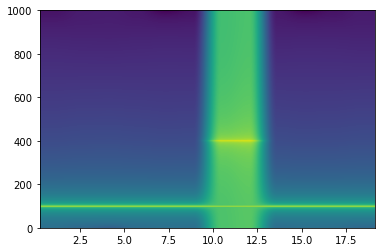

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import signal
from scipy.signal import savgol_filter
from sklearn import preprocessing
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
print(t)
s1 = np.sin(2 * np.pi * 100 * t)
print(s1)
s2 = 2 * np.sin(2 * np.pi * 400 * t)
print(s2)

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
# nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 # + nse  # the signal
NFFT = 4048# the length of the windowing segments
Fs = int(1 / dt)  # the sampling frequency

fig, ax = plt.subplots()
# ax1.plot(t, x)
Pxx, freqs, bins, im = ax.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
print(im.make_image(1)[0].shape)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()

In [116]:
def snv(input_data):
    """
        :snv: A correction technique which is done on each
        individual spectrum, a reference spectrum is not
        required
        :param input_data: Array of spectral data
        :type input_data: DataFrame
        
        :returns: data_snv (ndarray): Scatter corrected spectra
    """
    
    input_data = np.asarray(input_data)
    
    # Define a new array and populate it with the corrected data  
    data_snv = np.zeros_like(sinput_data)
    for i in range(data_snv.shape[0]):
    # Apply correction
        data_snv[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
    
    return (data_snv)

In [117]:
with open(r"D:\FARM_data\Soil_Spectra_s1\spectra_ BE.csv") as fi:
        re = csv.reader(fi)
        for c, ro in enumerate(re):
            if c == 10:
                break
            reflectance = np.array(ro[5:])
            r = savgol_filter(reflectance, 11, 2)
            
#             f, t, Sxx = signal.spectrogram(r, 1)
            
            sxx_sdv = np.array([[ (Sxx[i][j] - np.mean(Sxx[i]) ) / np.std(Sxx[i]) for j in range(Sxx.shape[1])] for i in range(Sxx.shape[0])])
#             print(sxx.shape)
            dt = 1
            NFFT = 512# the length of the windowing segments
            Fs = int(1 / dt)  # the sampling frequency
            rn = snv(r)
            fig, ax = plt.subplots()
            ax.axis('off')
            # ax1.plot(t, x)
            Pxx, freqs, bins, im = ax.specgram(rn[0], NFFT=NFFT, Fs=Fs, noverlap=200)
            print(im.make_image(1)[0])
            

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed